## Visualisations

In [31]:
# General
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import ast
from collections import Counter
import warnings
import seaborn as sns
import re
from scipy.stats import ttest_ind

warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
data = pd.read_csv('airbnb_data.csv')
top10 = pd.read_csv('top10_merged.csv')
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2022-12-16/data/calendar.csv.gz')

### Feature Importance

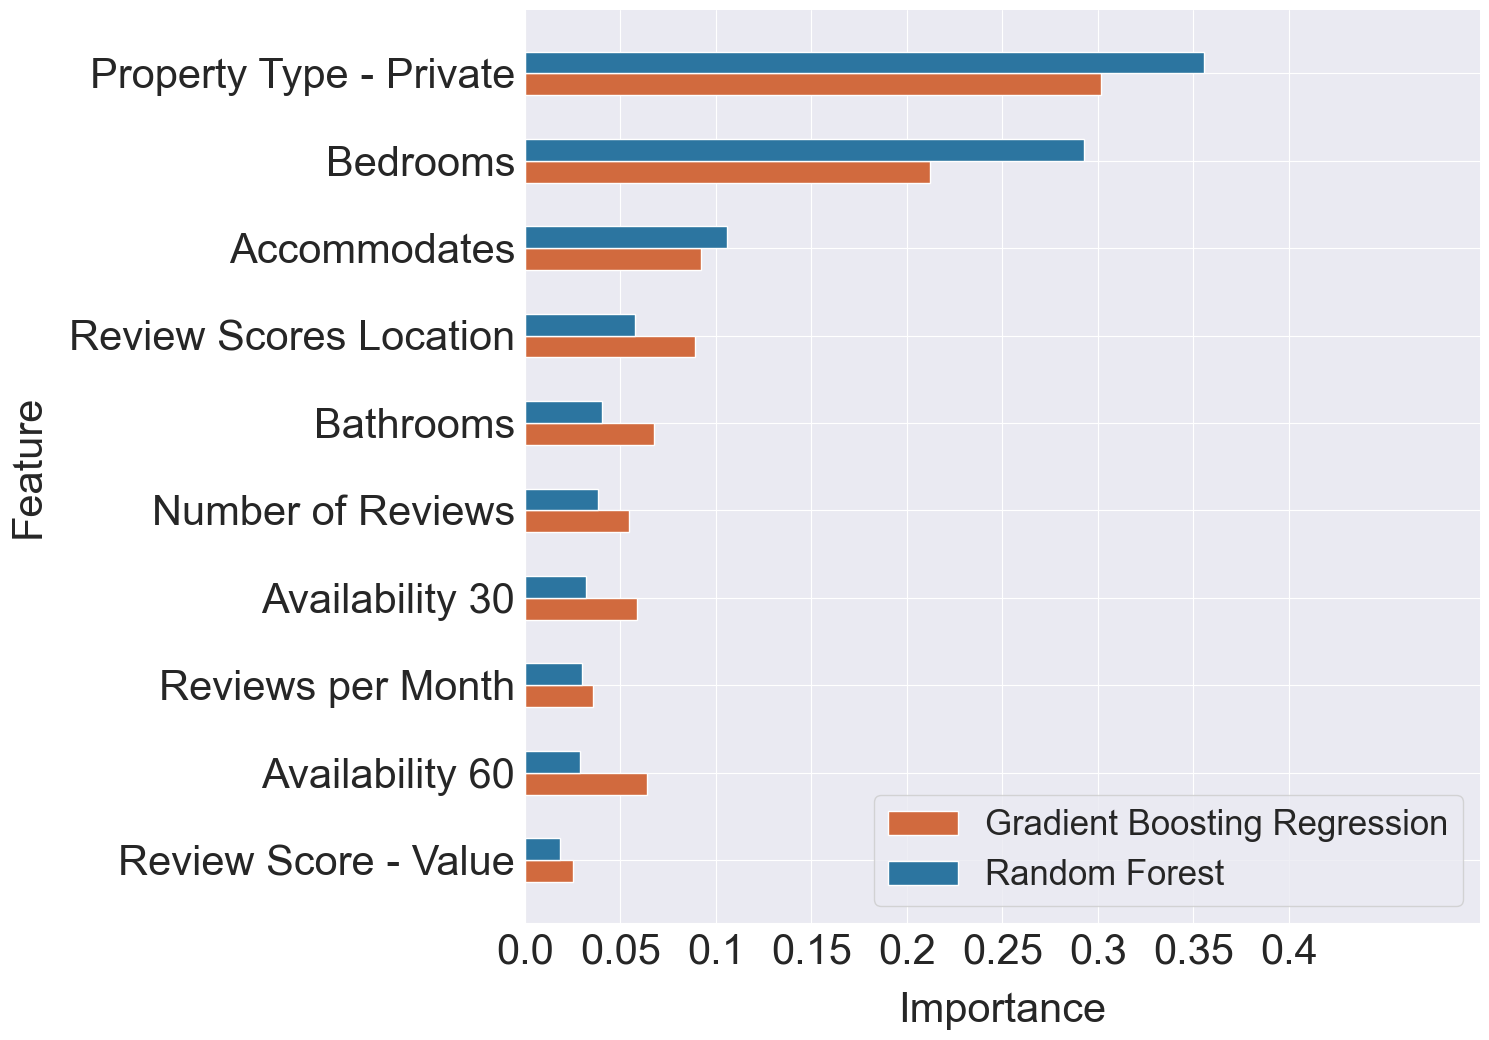

In [21]:
# Shades of gray
GREY30 = "#4d4d4d"
GREY40 = "#474747"
GREY60 = "#999999"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

top10 = top10.sort_values(by=['Importance_gbr'], ascending=False)
top10.index = ['Property Type - Private', 'Bedrooms', 'Accommodates', 'Review Scores Location', 'Bathrooms', 'Number of Reviews', 'Availability 30', 'Reviews per Month', 'Availability 60', 'Review Score - Value']

# display (top10)
# 2017 data
y2017 = top10.index.tolist()
x2017 = top10.Importance_gbr.tolist()

# 2018 data
y2018 = top10.index.tolist()
x2018 = top10.Importance_rf.tolist()

# set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(x2017))
r2 = [x + barWidth for x in r1]
    
fig, ax = plt.subplots(figsize=(15,10.5))

# Set title and labels
# ax.set_title('Feature Importances from Random Forest and Gradient Boosting Regression', fontweight='light', fontsize = 20, color=GREY30, x= 0.27, y=1.06)
ax.set_xlabel('Importance', fontsize=30)
ax.set_ylabel('Feature', fontsize = 30)

# Add padding
ax.yaxis.labelpad = 15
ax.xaxis.labelpad = 15

# Define sizes and rectangles
ind = np.arange(len(x2018))
width = 0.25

# Plot graphs
rects1 = ax.barh(ind + width, x2018, width, color='#d16a3e', label='Gradient Boosting Regression')
rects2 = ax.barh(ind, x2017, width, color='#2C75A0', label='Random Forest')

# Converts vlines to years and displays this as the tick labels
ax.set_xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], labels = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], fontsize = 30)
ax.set_yticks(ind +(width/2), labels = top10.index, fontsize = 30)

# Set limitis
ax.set_xlim(0,0.5)

# Customize spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Displays legend, sets tight layout and display graph
ax.legend(fontsize=25)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

### Most Important Factors Against Price to Inspect Relationships

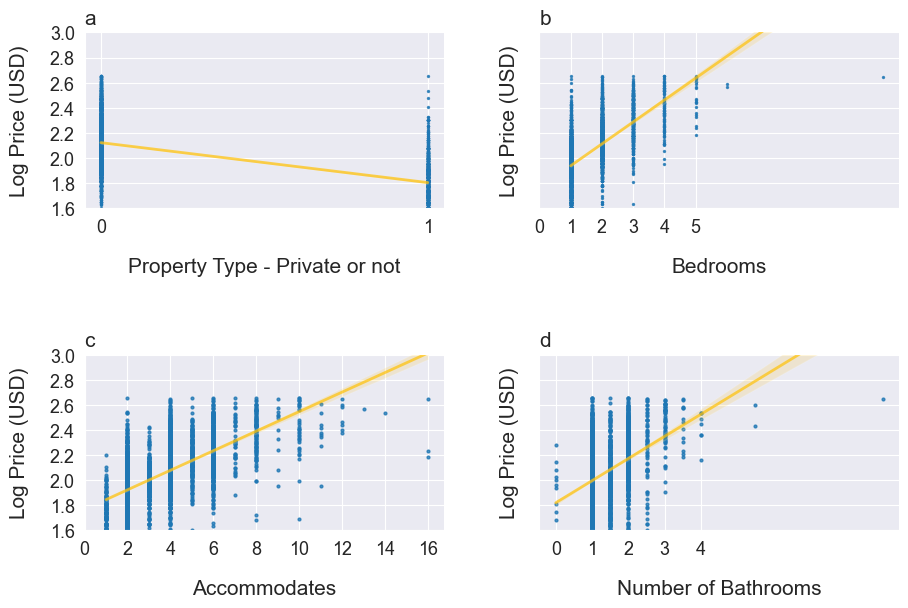

In [22]:
# Shades of gray
GREY30 = "#4d4d4d"
GREY40 = "#474747"
GREY60 = "#999999"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# GET DATA

# Plot figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,7), sharey='row')

# Plot 1
ax1.set_title("a", loc = "left", fontsize=15)
sns.regplot(x=data['property_type_Private'], y=data['price'], line_kws={"color":"#FFC107","alpha":0.7,"lw":2}, scatter_kws={'s':2}, ax=ax1)
ax1.set_xticks([0,1], labels = [0,1])
ax1.set_yticks([1.6,1.8,2.0,2.2,2.4,2.6,2.8, 3.0])
ax1.set_ylim(1.6,3)

# Labels and ticks
ax1.set_xlabel("Property Type - Private or not", fontsize = 15)
ax1.set_ylabel("Log Price (USD)", fontsize = 15)

# Plot 2
ax2.set_title("b", loc = "left", fontsize=15)
sns.regplot(x=data["bedrooms"], y=data["price"], line_kws={"color":"#FFC107","alpha":0.7,"lw":2}, scatter_kws={'s':2}, ax=ax2)
ax2.set_xticks([0,1,2,3,4,5], labels = [0,1,2,3,4,5])

# Labels and ticks
ax2.set_xlabel("Bedrooms", fontsize = 15)
ax2.set_ylabel("Log Price (USD)", fontsize = 15)

# Plot 3
# ax3.set_ylim(0,1.5)
ax3.set_title("c", loc = "left", fontsize=15)
sns.regplot(x=data["accommodates"], y=data["price"], line_kws={"color":"#FFC107","alpha":0.7,"lw":2}, scatter_kws={'s':4}, ax=ax3)
ax3.set_xticks([0,2,4,6,8,10,12,14,16], labels = [0,2,4,6,8,10,12,14,16])
ax3.set_yticks([1.6,1.8,2.0,2.2,2.4,2.6,2.8, 3.0])
ax3.set_ylim(1.6,3)

# Labels and ticks
ax3.set_xlabel("Accommodates", fontsize = 15)
ax3.set_ylabel("Log Price (USD)", fontsize = 15)

# Plot 4

# The horizontal plot is made using the hline function
sns.regplot(x=data["bathrooms_text"], y=data["price"], line_kws={"color":"#FFC107","alpha":0.7,"lw":2}, scatter_kws={'s':4}, ax=ax4)
ax4.set_xticks([0,1,2,3,4], labels=[0,1,2,3,4])

# Titles and labels
ax4.set_title("d", loc = "left", fontsize=15)
ax4.set_xlabel("Number of Bathrooms", fontsize = 15)
ax4.set_ylabel("Log Price (USD)", fontsize = 15)
         
# Customize spines: ax1
ax1.spines["right"].set_color("none")
ax1.spines["top"].set_color("none")

# Customize spines: ax2
ax2.spines["right"].set_color("none")
ax2.spines["top"].set_color("none")

# Customize spines: ax3
ax3.spines["right"].set_color("none")
ax3.spines["top"].set_color("none")

# Customize spines: ax4
ax4.spines["right"].set_color("none")
ax4.spines["top"].set_color("none")

#Padding
ax1.yaxis.labelpad = 15
ax1.xaxis.labelpad = 15

ax2.yaxis.labelpad = 15
ax2.xaxis.labelpad = 15

ax3.yaxis.labelpad = 15
ax3.xaxis.labelpad = 15

ax4.yaxis.labelpad = 15
ax4.xaxis.labelpad = 15

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax4.tick_params(axis='both', which='major', labelsize=13)

# Show the graph
fig.tight_layout(pad = 4.0)
plt.show()

### Correlogram of Important Features and Price

In [23]:
# Basic correlogram

d = data[['price', 'property_type_Private', 'bedrooms', 'review_scores_location', 'reviews_per_month', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'accommodates', 'bathrooms_text']]
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with annotations and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1, annot_kws={"fontsize": 15})

# Change the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

KeyError: "['review_scores_location', 'availability_30', 'availability_365'] not in index"

### Price Throughout the Year

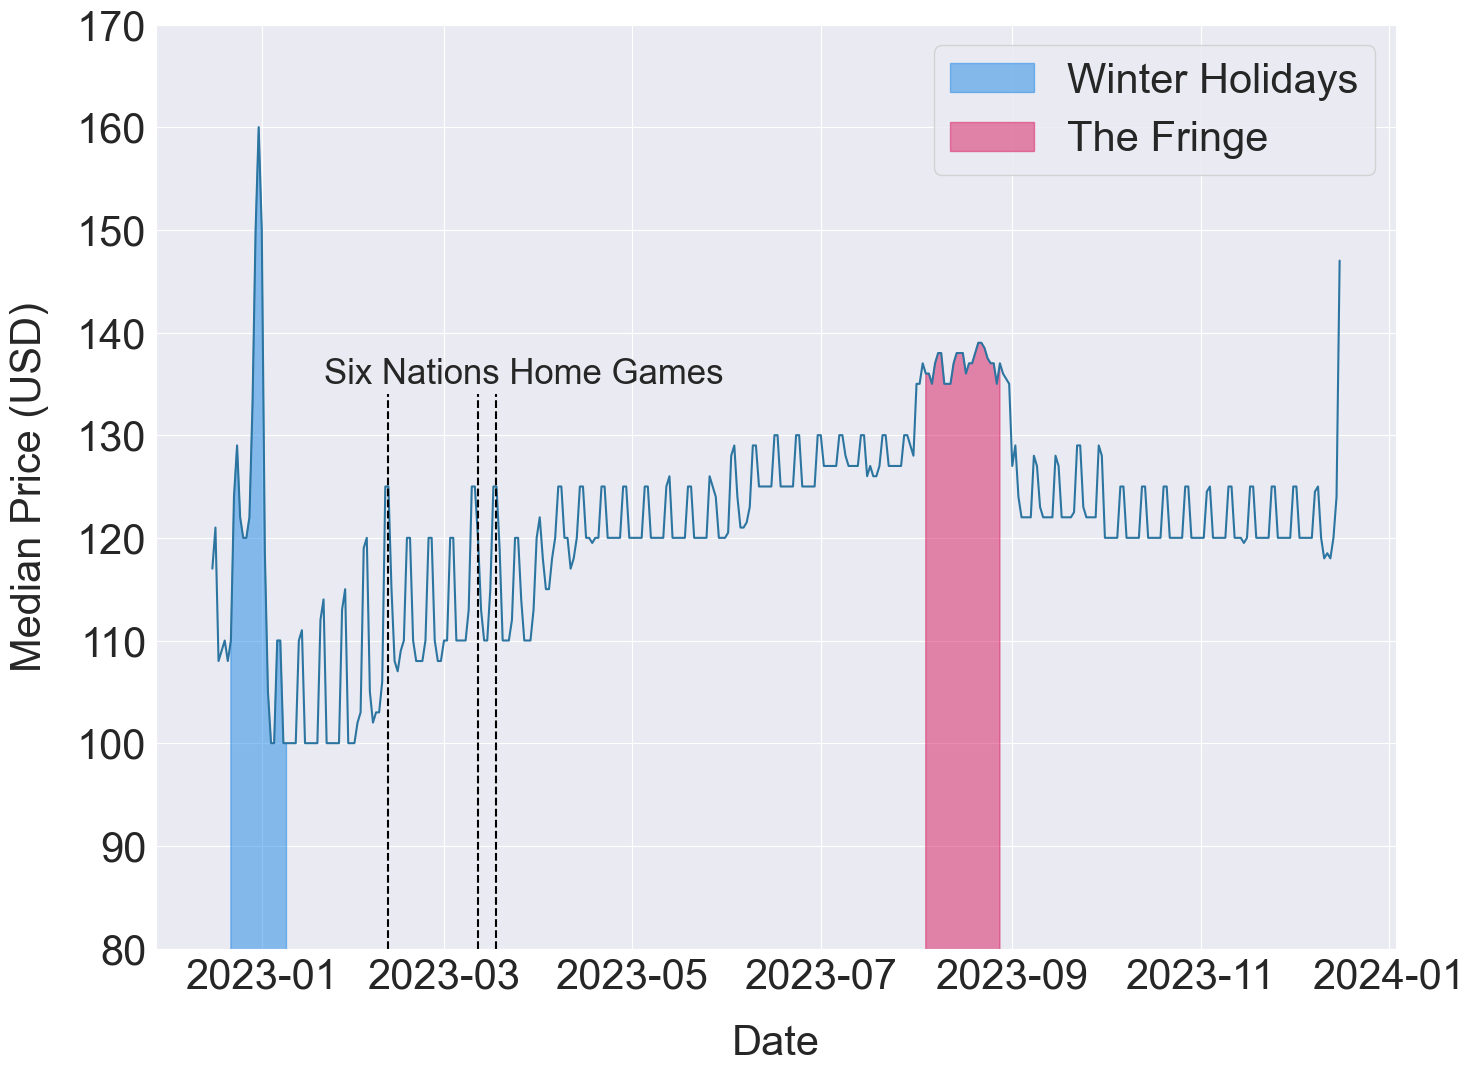

In [24]:
# Shades of gray
GREY30 = "#4d4d4d"
GREY40 = "#474747"
GREY60 = "#999999"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

df.dropna(inplace=True)

# Converting price to float
df['price'] = df['price'].str.replace("$", "")
df['price'] = df['price'].str.replace(",", "")
df['price'] = df['price'].astype(float)

# Dropping prices not greater than 0
df = df[df.price > 0]
# 
# Quartiles by the Empirical Rule
low = 0.025
high = 0.975
df_quantiles = df.quantile([low, high])

# Empirical Rule
low = df_quantiles['price'][low]
high = df_quantiles['price'][high]

# Remove outliers in the dataframe to include only two standard deviations
df = df[df['price']>=low]
df = df[df['price']<=high]

df['date'] = pd.to_datetime(df['date'])
df1 = df.groupby(['date']).median()['price'].reset_index()
# Reads in date column and changes it to a datetime value
x1 = df1.date

# Reads in y values and applies a logarithmic transform using the natural log
y1 = df1.price

# Initialize layout 
fig, ax = plt.subplots(figsize = (16, 12))

# Plot data
ax.plot(x1, y1, color='#2C75A0')

# Set titles and labels
ax.set_xlabel('Date', fontsize = 30, labelpad=20)
ax.set_ylabel('Median Price (USD)', fontsize = 30, labelpad=20)

# Customize spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_ylim(80, 170)

ax.fill_between(x1, 2, y1, where=(x1 >= '2022-12-22 00:00:00') & (x1 <= '2023-01-09 00:00:00'), alpha=0.5, label='Winter Holidays', color='#1E88E5')
ax.fill_between(x1, 2, y1, where=(x1 >= '2023-08-04 00:00:00') & (x1 <= '2023-08-28 00:00:00'), alpha=0.5, label='The Fringe', color='#D81B60')

ax.tick_params(axis='both', which='major', labelsize=30)

ax.axvline(x=np.datetime64('2023-02-11 00:00:00'), ymin=0, ymax=0.6, color='black', ls='dashed')
ax.axvline(x = np.datetime64('2023-03-12 00:00:00'), ymin=0, ymax=0.6, color='black', ls="dashed")
ax.axvline(np.datetime64('2023-03-18 00:00:00'), ymin=0, ymax=0.6, color='black', ls="dashed")

# Annotations indicating the meaning of the vertical line
ax.text(np.datetime64('2023-01-21 00:00:00'), 135, "Six Nations Home Games", 
        fontsize=25, fontweight=500, ha="left")

ax.legend(fontsize=30)

# Median for skewness

plt.show()

### Price Throughout The Fringe

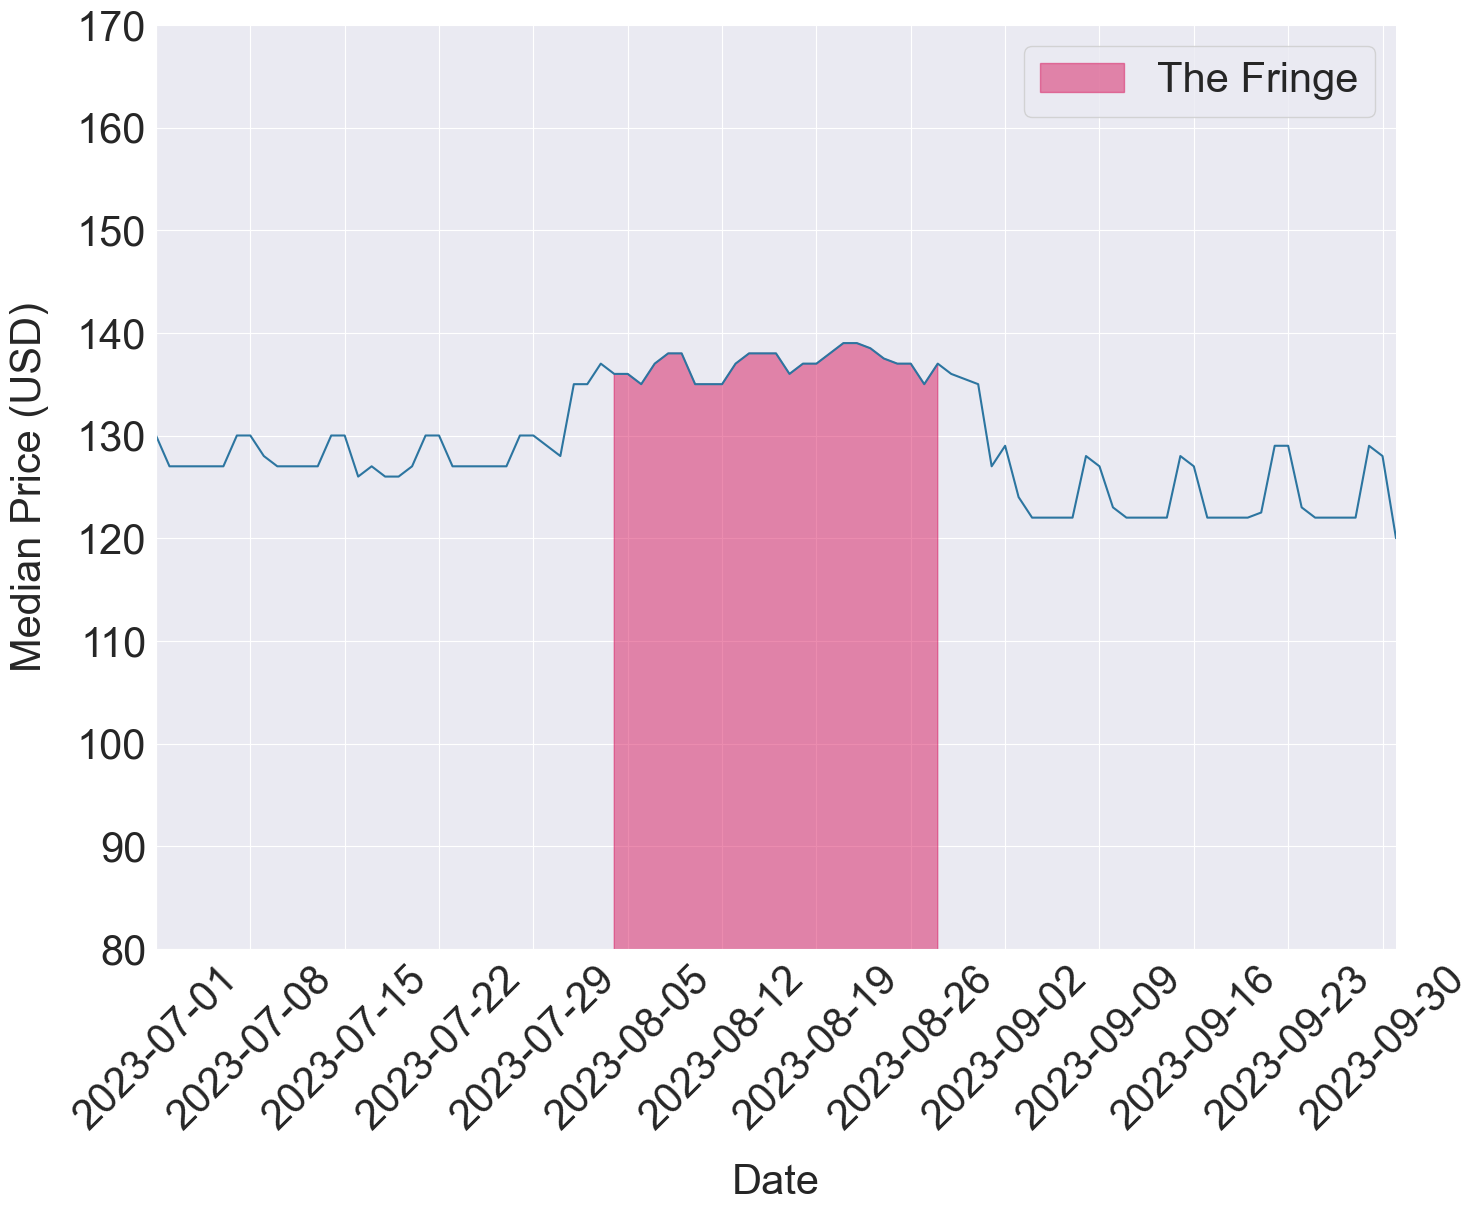

In [25]:
# Reads in date column and changes it to a datetime value
x1 = df1.date

# Reads in y values and applies a logarithmic transform using the natural log
y1 = df1.price

# Initialize layout 
fig, ax = plt.subplots(figsize = (16, 12))

# Plot data
ax.plot(x1, y1, color='#2C75A0')

# Set titles and labels
ax.set_xlabel('Date', fontsize = 30, labelpad=20)
ax.set_ylabel('Median Price (USD)', fontsize = 30, labelpad=20)

# Customize spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_xlim(np.datetime64('2023-07-01 00:00:00'), np.datetime64('2023-10-01 00:00:00'))
ax.set_ylim(80, 170)

ax.set_xticks([np.datetime64('2023-07-01 00:00:00'), np.datetime64('2023-07-08 00:00:00'), np.datetime64('2023-07-15 00:00:00'), np.datetime64('2023-07-22 00:00:00'), np.datetime64('2023-07-29 00:00:00'), np.datetime64('2023-08-05 00:00:00'), np.datetime64('2023-08-12 00:00:00'), np.datetime64('2023-08-19 00:00:00'), np.datetime64('2023-08-26 00:00:00'), np.datetime64('2023-09-02 00:00:00'), np.datetime64('2023-09-09 00:00:00'), np.datetime64('2023-09-16 00:00:00'), np.datetime64('2023-09-23 00:00:00'), np.datetime64('2023-09-30 00:00:00')], labels=['2023-07-01', '2023-07-08', '2023-07-15', '2023-07-22', '2023-07-29', '2023-08-05', '2023-08-12', '2023-08-19', '2023-08-26', '2023-09-02', '2023-09-09', '2023-09-16', '2023-09-23', '2023-09-30'], rotation=45)

ax.tick_params(axis='both', which='major', labelsize=30)

ax.fill_between(x1, 2, y1, where=(x1 >= '2023-08-04 00:00:00') & (x1 <= '2023-08-28 00:00:00'), alpha=0.5, label='The Fringe', color='#D81B60')
ax.legend(fontsize=30)

plt.show()

### T-Test - Does The Fringe Affect Price

In [29]:
# Define the date range for the summer months
start_date = pd.to_datetime('2023-08-04 00:00:00')
end_date = pd.to_datetime('2023-08-28 00:00:00')

# Filter the data based on the date range
summer_data = df1[np.logical_and(df1['date'] >= start_date, df1['date'] <= end_date)]
non_summer_data = df1[np.logical_or(df1['date'] < start_date, df1['date'] > end_date)]

summer_mean = summer_data['price'].median()
non_summer_mean = non_summer_data['price'].median()

t_statistic, p_value = ttest_ind(summer_data['price'], non_summer_data['price'])

print('Summer median price:', summer_mean)
print('Non-summer median price:', non_summer_mean)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

Summer median price: 137.0
Non-summer median price: 120.0
t-statistic: 9.733417300739143
p-value: 4.7270798300834866e-20


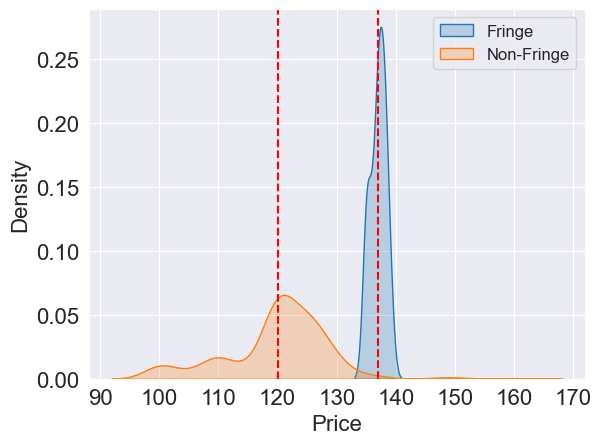

In [30]:
t_statistic, p_value = ttest_ind(summer_data['price'], non_summer_data['price'])

sns.kdeplot(summer_data['price'], shade=True, label="Fringe")
sns.kdeplot(non_summer_data['price'], shade=True, label="Non-Fringe")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Price", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(fontsize=12)

plt.axvline(summer_mean, color="red", linewidth=1.5, linestyle="--")
plt.axvline(non_summer_mean, color="red", linewidth=1.5, linestyle="--")